In [264]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [265]:
# Importing the dataset
df = pd.read_csv('breast-cancer-data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [266]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}) #Maliginant & Benign
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [267]:
X = df.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
y = df.diagnosis.values # Diagnosis

In [268]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [269]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [270]:
X_train.shape

(455, 19)

In [271]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [272]:
# Initialising the ANN
classifier = Sequential()

In [277]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 19))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [274]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.6053 - val_loss: 0.6956 - val_accuracy: 0.6225
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6316 - val_loss: 0.6587 - val_accuracy: 0.6159
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.5954 - val_loss: 0.6297 - val_accuracy: 0.6093
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.6250 - val_loss: 0.6071 - val_accuracy: 0.6026
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5566 - accuracy: 0.6283 - val_loss: 0.5871 - val_accuracy: 0.6026
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.6414 - val_loss: 0.5692 - val_accuracy: 0.6026
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5298 - accuracy: 0.6579 - val_loss: 0.5534 - val_accuracy: 0.6026
Epoch 8/100
3

Epoch 59/100
31/31 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9276 - val_loss: 0.1965 - val_accuracy: 0.9073
Epoch 60/100
31/31 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9276 - val_loss: 0.1958 - val_accuracy: 0.9073
Epoch 61/100
31/31 [==============================] - 0s 1ms/step - loss: 0.1757 - accuracy: 0.9309 - val_loss: 0.1950 - val_accuracy: 0.9073
Epoch 62/100
31/31 [==============================] - 0s 1ms/step - loss: 0.1739 - accuracy: 0.9342 - val_loss: 0.1929 - val_accuracy: 0.9073
Epoch 63/100
31/31 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9342 - val_loss: 0.1913 - val_accuracy: 0.9073
Epoch 64/100
31/31 [==============================] - 0s 2ms/step - loss: 0.1705 - accuracy: 0.9342 - val_loss: 0.1899 - val_accuracy: 0.9073
Epoch 65/100
31/31 [==============================] - 0s 1ms/step - loss: 0.1689 - accuracy: 0.9342 - val_loss: 0.1896 - val_accuracy: 0.9073
Epoch 

In [275]:
print(classifier.summary())

Model: "sequential_195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_596 (Dense)            (None, 6)                 120       
_________________________________________________________________
dense_597 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_598 (Dense)            (None, 1)                 7         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
None


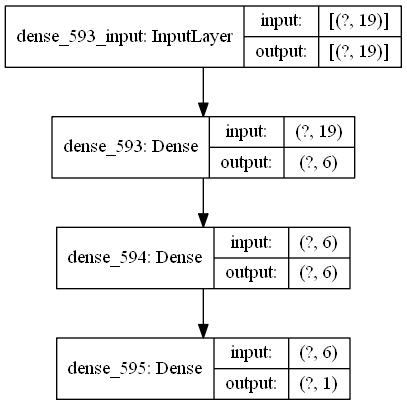

In [263]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


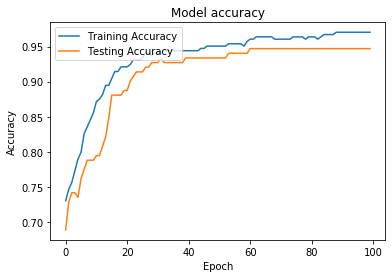

In [203]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


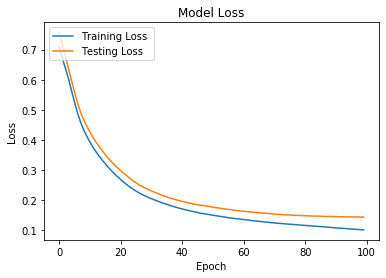

In [204]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss ', 'Testing Loss '], loc='upper left')
plt.show()

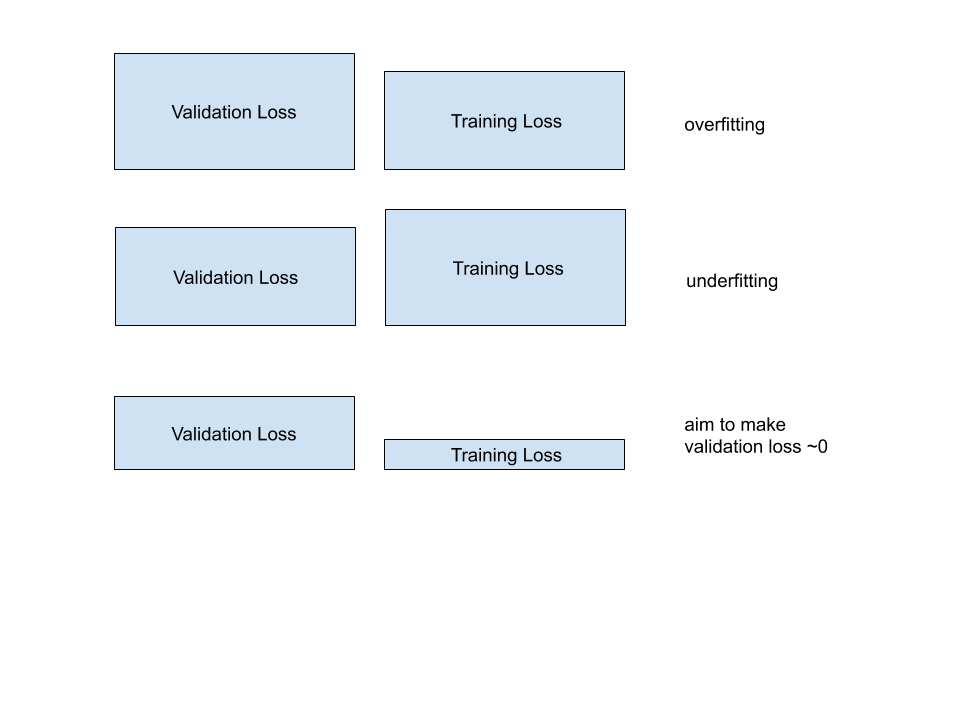

<pre><b><h2> 
If validation loss >> training loss you can call it overfitting.
If validation loss  > training loss you can call it some overfitting.
If validation loss  < training loss you can call it some underfitting.
If validation loss << training loss you can call it underfitting.
</b></pre></h2>

In [205]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

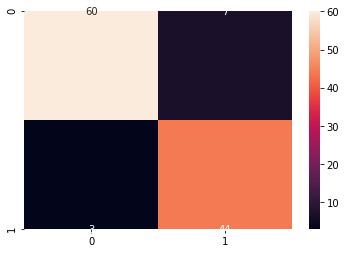

In [206]:
# Making the Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot = True)

In [207]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9122807017543859

## Hyper parameter Tuning To Decide Number of Hidden Layers in Neural Network

In [209]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [213]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid 

In [214]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [227]:
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [60, 100], epochs=[100])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [228]:
grid_result = grid.fit(X_train, y_train)

In [233]:
# Predicting the Test set results
y_pred = grid.predict(X_test)
y_pred = (y_pred > 0.5)

In [234]:
[grid_result.best_score_,grid_result.best_params_]

[0.9604395627975464,
 {'activation': 'relu', 'batch_size': 60, 'epochs': 100, 'layers': [40, 20]}]

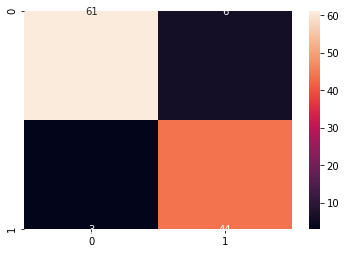

In [235]:
# Making the Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot = True)

In [236]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9210526315789473